In [ ]:
CREDIT C

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy



In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())


(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

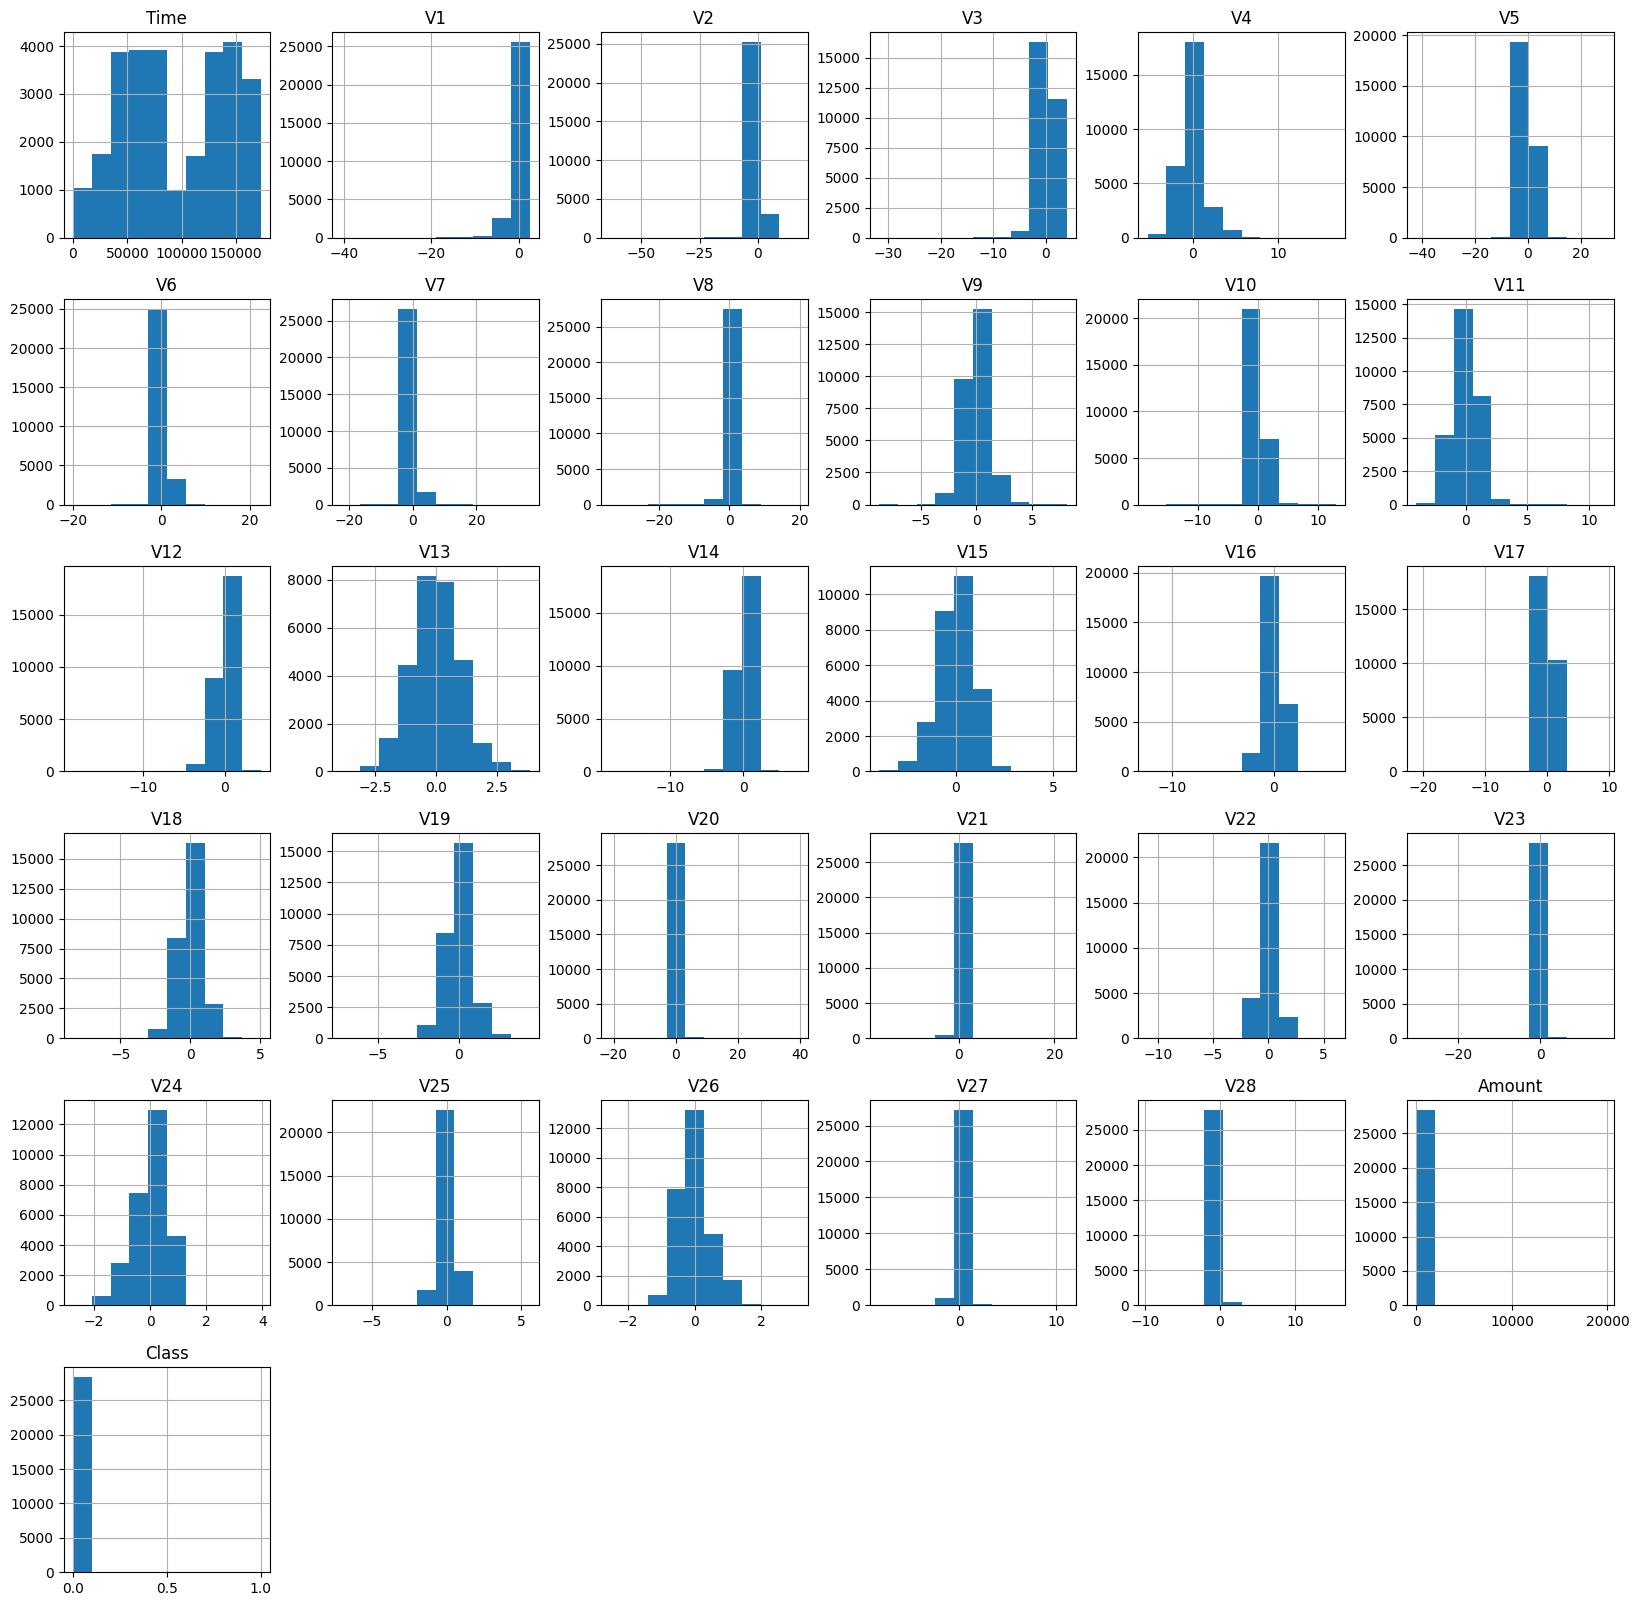

In [5]:
data.hist(figsize = (20, 20))
plt.show()

In [6]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

In [7]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017234102419808666


In [8]:
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


Fraud Cases: 49
Valid Transactions: 28432


In [9]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))


<Figure size 1200x900 with 0 Axes>

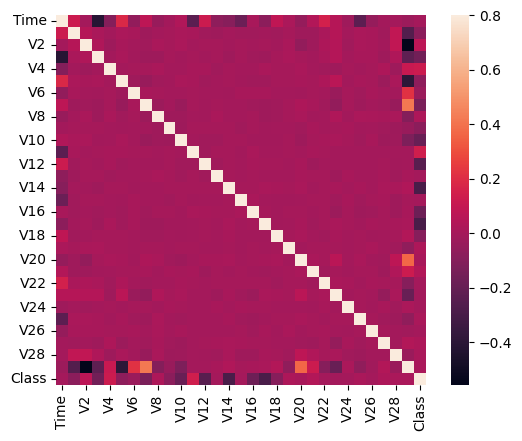

In [10]:
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [11]:
columns = data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [12]:
columns = [c for c in columns if c not in ["Class"]]

In [13]:
target = "Class"

In [14]:
X = data[columns]
Y = data[target]

In [15]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [17]:
state = 1

In [18]:
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
    
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>